# 2. Visualization of cross-validated RSA clusters

## Goal

Along with volumetric maps (via ANFI), we visualized cross-validated RSA clusters using surface-based mapping.

## Details

In [13]:
# Imports
from pathlib import Path

import matplotlib.pyplot as plt
from neuromaps.datasets import fetch_fslr
from neuromaps.transforms import mni152_to_fslr
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
from surfplot import Plot

plt.rcParams.update({"figure.facecolor": (0, 0, 0, 0)})  # Transparent background

In [10]:
# Find the cluster mask directory with respect to the git root
GIT_ROOT_LINES = !git rev-parse --show-toplevel
GIT_ROOT = Path(GIT_ROOT_LINES[0])
cluster_mask_dir = GIT_ROOT / "second-level" / "output" / "cross_validated_cluster_mask"

# All cross-validated cluster mask paths
recent_2_trial_mask_path = (
    cluster_mask_dir
    / "recent_2_trial"
    / "recent_2_trial_cross_validated_cluster_mask.nii"
)
recent_3_trial_mask_path = (
    cluster_mask_dir
    / "recent_3_trial"
    / "recent_3_trial_cross_validated_cluster_mask_vox20.nii"
)
recent_2_recent_3_trial_mask_path = (
    cluster_mask_dir
    / "recent_2_and_recent_3_trial"
    / "recent_2_recent_3_trial_overlap_cluster_mask_vox20.nii"
)

In [11]:
# A helper function for visualization of a binaray mask
# REF: https://surfplot.readthedocs.io/en/latest/auto_examples/examples/plot_example_02.html#sphx-glr-auto-examples-examples-plot-example-02-py
def plot_surf_mask(map_path: Path):
    gii_lh, gii_rh = mni152_to_fslr(map_path, method="nearest")

    data_lh = gii_lh.agg_data()
    data_rh = gii_rh.agg_data()

    surfaces = fetch_fslr()
    lh, rh = surfaces["inflated"]
    sulc_lh, sulc_rh = surfaces["sulc"]

    p = Plot(lh, rh)
    p.add_layer({"left": sulc_lh, "right": sulc_rh}, cmap="binary_r", cbar=False)

    cmap = nilearn_cmaps["black_red"]
    p.add_layer(
        {"left": data_lh, "right": data_rh}, cmap=cmap, cbar=False, color_range=(0, 3)
    )

    fig = p.build()
    fig.show()

### Cross-validated Recent-2 Trial RSA mask

Note:

- Row: lateral / medial
- Column: left / right

/tmp/ipykernel_3084295/174912090.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


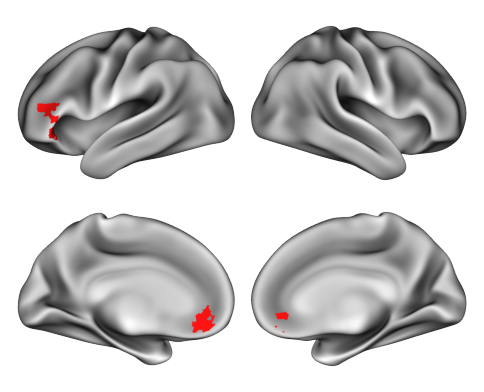

In [15]:
plot_surf_mask(recent_2_trial_mask_path)

### Cross-validated Recent-3 Trial RSA mask


/tmp/ipykernel_3084295/174912090.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


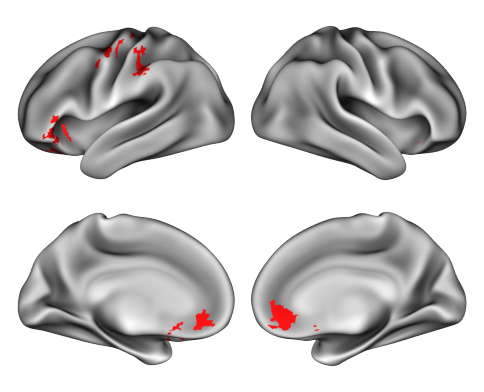

In [16]:
plot_surf_mask(recent_3_trial_mask_path)

### Cross-validated Feedback History RSA mask (Recent-2 Trial & Recent-3 Trial)

/tmp/ipykernel_3084295/174912090.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


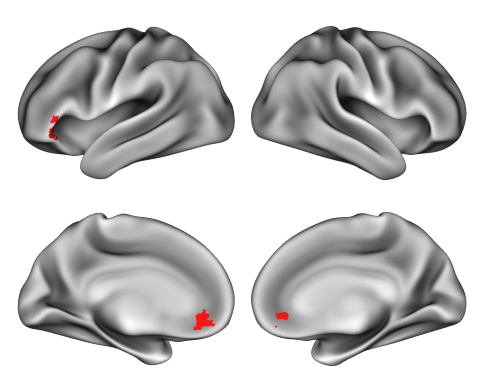

In [17]:
plot_surf_mask(recent_2_recent_3_trial_mask_path)